In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz

In [2]:
!tar xf spark-3.0.1-bin-hadoop2.7.tgz
!pip install -q findspark

In [3]:
import os 
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content//spark-3.0.1-bin-hadoop2.7"

In [4]:
import findspark
findspark.init()

In [5]:
! pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.3 MB/s 


In [6]:
from pyspark.sql.types import *
from pyspark.sql.functions import * 

In [7]:
import numpy as np
import pandas as pd
from io import StringIO

In [10]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkML_1').getOrCreate()
df = spark.read.csv('/content/bank_data.csv', header = True, inferSchema = True)

In [11]:
spark

In [12]:
bankDataSchema = StructType([
                 StructField("seqId",IntegerType(),True),
                 StructField("age",IntegerType(),True),
                 StructField("job",StringType(),True),
                 StructField("maritalStatus",StringType(),True),
                 StructField("education",StringType(),True),
                 StructField("default",StringType(),True),
                 StructField("balance",DoubleType(),True),
                 StructField("housing",StringType(),True),
                 StructField("loan",StringType(),True),
                 StructField("contact",StringType(),True),
                 StructField("day",IntegerType(),True),
                 StructField("month",StringType(),True),
                 StructField("duration",DoubleType(),True),
                 StructField("campaign",DoubleType(),True),
                 StructField("pdays",DoubleType(),True),
                 StructField("previous",DoubleType(),True),
                 StructField("poutcome",StringType(),True),
                 StructField("opened_new_td_act_yes_no",StringType(),True)
                 ])

In [17]:
bankDF = spark.read.format('csv')\
.option('header','false')\
.option('inferSchema','true')\
.load("bank_data.csv", schema=bankDataSchema)

In [18]:
bankDF.printSchema()

root
 |-- seqId: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- maritalStatus: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: double (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: double (nullable = true)
 |-- campaign: double (nullable = true)
 |-- pdays: double (nullable = true)
 |-- previous: double (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- opened_new_td_act_yes_no: string (nullable = true)



In [19]:
bankDF.dtypes

[('seqId', 'int'),
 ('age', 'int'),
 ('job', 'string'),
 ('maritalStatus', 'string'),
 ('education', 'string'),
 ('default', 'string'),
 ('balance', 'double'),
 ('housing', 'string'),
 ('loan', 'string'),
 ('contact', 'string'),
 ('day', 'int'),
 ('month', 'string'),
 ('duration', 'double'),
 ('campaign', 'double'),
 ('pdays', 'double'),
 ('previous', 'double'),
 ('poutcome', 'string'),
 ('opened_new_td_act_yes_no', 'string')]

In [20]:
bankDF.show(3)

+-----+---+----------+-------------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
|seqId|age|       job|maritalStatus|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_yes_no|
+-----+---+----------+-------------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
| 1001| 30|unemployed|      married|  primary|     no| 1787.0|     no|  no|cellular| 19|  oct|    79.0|     1.0| -1.0|     0.0| unknown|                      no|
| 1002| 33|  services|      married|secondary|     no| 4789.0|    yes| yes|cellular| 11|  may|   220.0|     1.0|339.0|     4.0| failure|                      no|
| 1003| 35|management|       single| tertiary|     no| 1350.0|    yes|  no|cellular| 16|  apr|   185.0|     1.0|330.0|     1.0| failure|                      no|
+-----+---+----------+------

In [21]:
bankDF.cache()

DataFrame[seqId: int, age: int, job: string, maritalStatus: string, education: string, default: string, balance: double, housing: string, loan: string, contact: string, day: int, month: string, duration: double, campaign: double, pdays: double, previous: double, poutcome: string, opened_new_td_act_yes_no: string]

In [22]:
bankDF.take(2)

[Row(seqId=1001, age=30, job='unemployed', maritalStatus='married', education='primary', default='no', balance=1787.0, housing='no', loan='no', contact='cellular', day=19, month='oct', duration=79.0, campaign=1.0, pdays=-1.0, previous=0.0, poutcome='unknown', opened_new_td_act_yes_no='no'),
 Row(seqId=1002, age=33, job='services', maritalStatus='married', education='secondary', default='no', balance=4789.0, housing='yes', loan='yes', contact='cellular', day=11, month='may', duration=220.0, campaign=1.0, pdays=339.0, previous=4.0, poutcome='failure', opened_new_td_act_yes_no='no')]

In [24]:
len(bankDF.columns)

18

In [25]:
bankDF.count() #Row count

4521

In [26]:
bankDF = bankDF.drop('seqId')

In [27]:
len(bankDF.columns)

17

In [28]:
bankDF.describe().show()

+-------+------------------+-------+-------------+---------+-------+------------------+-------+----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+------------------------+
|summary|               age|    job|maritalStatus|education|default|           balance|housing|loan| contact|               day|month|          duration|          campaign|             pdays|          previous|poutcome|opened_new_td_act_yes_no|
+-------+------------------+-------+-------------+---------+-------+------------------+-------+----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+------------------------+
|  count|              4521|   4521|         4521|     4521|   4521|              4521|   4521|4521|    4521|              4521| 4521|              4521|              4521|              4521|              4521|    4521|                    4521|
|   mean| 41.1700951

In [29]:
bankDF.describe().select('summary','age','loan','balance','pdays').show()

+-------+------------------+----+------------------+------------------+
|summary|               age|loan|           balance|             pdays|
+-------+------------------+----+------------------+------------------+
|  count|              4521|4521|              4521|              4521|
|   mean| 41.17009511170095|null|1422.6578190665782|39.766644547666445|
| stddev|10.576210958711263|null|3009.6381424673395|100.12112444301656|
|    min|                19|  no|           -3313.0|              -1.0|
|    max|                87| yes|           71188.0|             871.0|
+-------+------------------+----+------------------+------------------+



In [30]:
bankDF.agg(*(min(col(c)).alias(c) for c in bankDF.columns)).show()

+---+------+-------------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
|age|   job|maritalStatus|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_yes_no|
+---+------+-------------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
| 19|admin.|     divorced|  primary|     no|-3313.0|     no|  no|cellular|  1|  apr|     4.0|     1.0| -1.0|     0.0| failure|                      no|
+---+------+-------------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+



In [88]:
bankDF.agg(*(max(col(c)).alias(c) for c in bankDF.columns)).show()

+---+-------+-------------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------------------------+
|age|    job|maritalStatus|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_yes_no|
+---+-------+-------------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------------------------+
| 87|unknown|       single|  unknown|    yes|71188.0|    yes| yes|unknown| 31|  sep|  3025.0|    50.0|871.0|    25.0| unknown|                     yes|
+---+-------+-------------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------------------------+



In [31]:
bankDF.where(bankDF.balance < 0).count()  #Count of negetive balances

366

In [32]:
from pyspark.sql.functions import when 
bankDF = bankDF.withColumn('balance',when(bankDF.balance>0,bankDF.balance).otherwise(0))  #witholumn - Make changes to column 
zerobalanceDF = bankDF.where(bankDF.balance < 0) #replace -ve balances with zeros
zerobalanceDF.count()

0

In [33]:
bankDF.createOrReplaceTempView('bankDFTable')

In [34]:
resultDF = spark.sql("""
 SELECT opened_new_td_act_yes_no, COUNT(*) AS count
 FROM bankDFTable
 GROUP BY opened_new_td_act_yes_no
""")

In [35]:
resultDF.show()

+------------------------+-----+
|opened_new_td_act_yes_no|count|
+------------------------+-----+
|                      no| 4000|
|                     yes|  521|
+------------------------+-----+



In [89]:
pdDF

,education,count
0,unknown,19
1,tertiary,193
2,secondary,245
3,primary,64


In [ ]:
bankDF.groupBy("opened_new_td_act_yes_no").count().show()

+------------------------+-----+
|opened_new_td_act_yes_no|count|
+------------------------+-----+
|                      no| 4000|
|                     yes|  521|
+------------------------+-----+



In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio
import plotly
chart_studio.tools.set_credentials_file(username='rach_13', api_key='5bwcbLgYqifH6eycZZjO')
import plotly.figure_factory as ff
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objects as go
import warnings
### Initialize settings 
sns.set_style('whitegrid')
sns.set(color_codes=True)
warnings.filterwarnings('ignore')
pyoff.init_notebook_mode(connected=True)
get_ipython().magic('matplotlib inline')

In [38]:
pdDF = resultDF.toPandas()
data = [
        go.Bar(
            x=pdDF['opened_new_td_act_yes_no'],
            y=pdDF['count']
        )

]
layout = go.Layout(title='Term Deposit Yes/No Counts')
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

### Other variables that could be considered for exploratory data analysis

loan vs opened_new_td_act_yes_no</br>
marital_status vs opened_new_td_act_yes_no</br>
job vs opened_new_td_act_yes_no</br>
education </br>
Divorced,married, single </br>

In [39]:
resultDF = bankDF.crosstab('opened_new_td_act_yes_no','loan') #crosstabb --> pairwise frequency

In [40]:
resultDF.show()

+-----------------------------+----+---+
|opened_new_td_act_yes_no_loan|  no|yes|
+-----------------------------+----+---+
|                          yes| 478| 43|
|                           no|3352|648|
+-----------------------------+----+---+



In [41]:
pdDF = resultDF.toPandas()

In [42]:
pdDF.columns = ['opened_new_td_act_yes_no_loan','No_Existing_loan','Existing_loan']

In [43]:
data = [
     go.Bar(
            x=['Opted_for_loan','No_opted_loan'],
            y=pdDF['No_Existing_loan'],
            name='No Existing Loans'
        ),
     go.Bar(
         x = ['Opted_for_loan','Not_opted_loan'],
         y = pdDF['Existing_loan'],
         name = 'Existing Loans'
     ) 
]
layout=go.Layout(
    title='Exsiting/Non-existing loans - Counts'
)
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)  

In [44]:
### For different job categories 
resultDF = spark.sql("""
SELECT 
   job,
   COUNT(*) AS term_deposit_yes_cnt
   FROM bankDFTable
   WHERE opened_new_td_act_yes_no = "yes"
   GROUP BY job
""")

In [45]:
pdDF = resultDF.toPandas()
data = [
       go.Bar(
           x = pdDF['job'],
           y = pdDF['term_deposit_yes_cnt']
       ) 
]
layout = go.Layout(title="Term deposit counts in each job category")
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [46]:
### For different job categories 
resultDF = spark.sql("""
SELECT 
   job,
   COUNT(*) AS term_deposit_no_cnt
   FROM bankDFTable
   WHERE opened_new_td_act_yes_no = "no"
   GROUP BY job
""")

In [47]:
pdDF = resultDF.toPandas()
data = [
       go.Bar(
           x = pdDF['job'],
           y = pdDF['term_deposit_no_cnt']
       ) 
]
layout = go.Layout(title="Term deposit not opted counts in each job category")
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [48]:
resultDF = bankDF.filter(expr("opened_new_td_act_yes_no='yes'")).groupBy("education").count()
resultDF.show()

+---------+-----+
|education|count|
+---------+-----+
|  unknown|   19|
| tertiary|  193|
|secondary|  245|
|  primary|   64|
+---------+-----+



In [49]:
pdDF = resultDF.toPandas()
data = [
      go.Bar(
          x = pdDF['education'],
          y = pdDF['count']
      )  
]
layout = go.Layout(title="Term deposit opted count in each education level")
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [50]:
bankDF_pd = bankDF.toPandas()
bankDF_pd.head()

,age,job,maritalStatus,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,opened_new_td_act_yes_no
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79.0,1.0,-1.0,0.0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220.0,1.0,339.0,4.0,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185.0,1.0,330.0,1.0,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199.0,4.0,-1.0,0.0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226.0,1.0,-1.0,0.0,unknown,no


In [90]:
correlations = bankDF_pd.corr()
correlations

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.084202,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.084202,1.000000,-0.007595,-0.015195,-0.010840,0.008616,0.026031
day,-0.017853,-0.007595,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015195,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.010840,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.008616,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026031,-0.059114,0.018080,-0.067833,0.577562,1.000000


In [52]:
trace = go.Heatmap(z=[correlations['age'],correlations['balance'],
                      correlations['day'],correlations['duration'],
                      correlations['campaign'],
                      correlations['pdays'],correlations['previous']],
                   x = ['age','balance','day','duration','campaign','pdays','previous'],
                   y = ['age','balance','day','duration','campaign','pdays','previous'])
data = [trace]
layout = go.Layout(title='HeatMap')
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [53]:
bankDF.select([count(when(isnan(c) | col(c).isNull(),c).otherwise(None)).alias(c) for c in bankDF.columns]).show()

+---+---+-------------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------------------------+
|age|job|maritalStatus|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_yes_no|
+---+---+-------------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------------------------+
|  0|  0|            0|        0|      0|      0|      0|   0|      0|  0|    0|       0|       0|    0|       0|       0|                       0|
+---+---+-------------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------------------------+



In [54]:
data_df = bankDF.na.drop(how="any") #how = any --> any attribute is missing deal wih that val
print("Count of the  records in the datset before dropping null values ", bankDF.count())
print("Count of the records in the dataset after dropping null values", data_df.count())

Count of the  records in the datset before dropping null values  4521
Count of the records in the dataset after dropping null values 4521


In [55]:
(trainingData,testingData) = bankDF.randomSplit([0.7,0.3]) #randomsplit fr pd,,,, train_test_split fr normal data

In [56]:
trainingData.show(4)

+---+-------+-------------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
|age|    job|maritalStatus|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_yes_no|
+---+-------+-------------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
| 19|student|       single|  primary|     no|  103.0|     no|  no|cellular| 10|  jul|   104.0|     2.0| -1.0|     0.0| unknown|                     yes|
| 19|student|       single|secondary|     no|  302.0|     no|  no|cellular| 16|  jul|   205.0|     1.0| -1.0|     0.0| unknown|                     yes|
| 19|student|       single|  unknown|     no|    0.0|     no|  no|cellular| 11|  feb|   123.0|     3.0| -1.0|     0.0| unknown|                      no|
| 20|student|       single|secondary|     no| 1191.0|     no|  no|cellular| 12|  f

In [ ]:
testingData.show(4)

+---+--------+-------------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+------------------------+
|age|     job|maritalStatus|education|default|balance|housing|loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_yes_no|
+---+--------+-------------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+------------------------+
| 19| student|       single|  primary|     no|  103.0|     no|  no| cellular| 10|  jul|   104.0|     2.0| -1.0|     0.0| unknown|                     yes|
| 19| student|       single|  unknown|     no|    0.0|     no|  no| cellular| 11|  feb|   123.0|     3.0| -1.0|     0.0| unknown|                      no|
| 20| student|       single|secondary|     no|  291.0|     no|  no|telephone| 11|  may|   172.0|     5.0|371.0|     5.0| failure|                      no|
| 21|services|       single|secondary|     no| 1903.0|    yes|  no|  u

In [57]:
cat_Var_names = ['job','maritalStatus','education','default','housing','day','contact','month','poutcome']
num_var_names = ['age','balance','duration','previous','pdays','campaign']

In [ ]:
#Building pipeline... using op of prev n use it further.

In [91]:
from pyspark.ml.feature import VectorAssembler #VectorAssembler takes row wise values and take it as a vector.
vector_assembler_numVars = VectorAssembler(inputCols=num_var_names , outputCol="num_features_all")

In [92]:
from pyspark.ml.feature import MinMaxScaler
min_max_Scalar_NumVars = MinMaxScaler(inputCol="num_features_all",outputCol="scaled_num_features")

In [98]:
#numerical-- vector assemble and minmax scaler
#categorical - stringindexing(label enc in py) and onehot enc 
#At the end merge everything using vector assembler

In [99]:
#onehot - others (ordinal/norminal) -independent
#lable enc - nly fr target - dependent
from pyspark.ml.feature import StringIndexer, OneHotEncoder
indexers_Cat = [StringIndexer(inputCol=cat_var_name,outputCol="{0}_index".format(cat_var_name))
                for cat_var_name in cat_Var_names]

encoders_Cat = [OneHotEncoder(inputCol=indexer.getOutputCol(),outputCol="{0}_vec".format(indexer.getInputCol())) for indexer in indexers_Cat]

assembler_Cat = VectorAssembler(inputCols=[encoder.getOutputCol() for encoder in encoders_Cat],outputCol="cat_features")
assembler = VectorAssembler(inputCols=["scaled_num_features","cat_features"],outputCol="features")

In [100]:
indexer_Label = StringIndexer(inputCol="opened_new_td_act_yes_no",outputCol="label")

In [101]:
preprocessingStages = [vector_assembler_numVars] + [min_max_Scalar_NumVars] + indexers_Cat + encoders_Cat + [assembler_Cat] + [assembler] + [indexer_Label]

In [102]:
type(preprocessingStages)

list

In [103]:
preprocessingStages
#All pipelile operations done previously in a list.
#[vector_assembler_numVars] + [min_max_Scalar_NumVars] + indexers_Cat + encoders_Cat + [assembler_Cat] + [assembler] + [indexer_Label]

[VectorAssembler_564049b2586b,
 MinMaxScaler_08e05e25adf9,
 StringIndexer_66171a758dc1,
 StringIndexer_7db7b23f93d2,
 StringIndexer_6d2e4613a590,
 StringIndexer_18ecd88e2f21,
 StringIndexer_701b7b85f2e0,
 StringIndexer_44a95c22b5af,
 StringIndexer_acc8fa1cba42,
 StringIndexer_55f75643c0df,
 StringIndexer_c4cbe0841a7e,
 OneHotEncoder_18363b67cf43,
 OneHotEncoder_d62590bd3af6,
 OneHotEncoder_6d400289eb99,
 OneHotEncoder_b2da869108ca,
 OneHotEncoder_24b9144bc240,
 OneHotEncoder_af193c4d9d52,
 OneHotEncoder_9a672dbb26c8,
 OneHotEncoder_4ece83983318,
 OneHotEncoder_9542dbb0900d,
 VectorAssembler_e32f80f6c1f0,
 VectorAssembler_5cdebc696090,
 StringIndexer_94f1ae76248b]

In [106]:
#Perform Logistic Regression.
from pyspark.ml.classification import LogisticRegression
lr =  LogisticRegression(maxIter=10,labelCol="label",featuresCol="features")
from pyspark.ml import Pipeline
lr_pipeline = Pipeline(stages=preprocessingStages+[lr])
lr_pipeline_model = lr_pipeline.fit(trainingData)

In [107]:
lr_pipeline_model.stages #handleInvalid=error --> if any invalid attribute.. ill get an error.

[VectorAssembler_564049b2586b,
 MinMaxScalerModel: uid=MinMaxScaler_08e05e25adf9, numFeatures=6, min=0.0, max=1.0,
 StringIndexerModel: uid=StringIndexer_66171a758dc1, handleInvalid=error,
 StringIndexerModel: uid=StringIndexer_7db7b23f93d2, handleInvalid=error,
 StringIndexerModel: uid=StringIndexer_6d2e4613a590, handleInvalid=error,
 StringIndexerModel: uid=StringIndexer_18ecd88e2f21, handleInvalid=error,
 StringIndexerModel: uid=StringIndexer_701b7b85f2e0, handleInvalid=error,
 StringIndexerModel: uid=StringIndexer_44a95c22b5af, handleInvalid=error,
 StringIndexerModel: uid=StringIndexer_acc8fa1cba42, handleInvalid=error,
 StringIndexerModel: uid=StringIndexer_55f75643c0df, handleInvalid=error,
 StringIndexerModel: uid=StringIndexer_c4cbe0841a7e, handleInvalid=error,
 OneHotEncoderModel: uid=OneHotEncoder_18363b67cf43, dropLast=true, handleInvalid=error,
 OneHotEncoderModel: uid=OneHotEncoder_d62590bd3af6, dropLast=true, handleInvalid=error,
 OneHotEncoderModel: uid=OneHotEncoder_6d

In [108]:
lr_pipeline_model.stages[-1].coefficients #-1 --> nly last stage of pipeline (LR) will gve coeff to the attribute.

DenseVector([0.3381, 0.1865, 12.9016, 0.4801, 0.8698, -2.5782, -0.2791, 0.1874, 0.0661, 0.1271, -0.3318, 0.5973, -0.1987, -0.5201, -0.5422, -0.2254, 0.588, -0.2831, -0.0053, -0.105, 0.184, -0.0807, -0.7901, -0.4353, -0.5637, 0.3999, -0.7422, -0.1052, -0.4321, -0.2587, 0.3137, 0.0395, -0.3826, 0.3167, -0.2928, -0.5488, 0.3536, -0.1412, 0.1685, -0.1358, 0.2516, -0.0148, -0.1419, 0.6561, 0.0167, -0.2213, 0.4148, 0.1149, -0.1247, 0.6219, -0.1222, 0.4334, 0.6335, 0.4297, 0.3453, -0.6269, -0.5507, -0.348, -0.0995, 0.3501, -0.2138, 0.6009, 0.4812, -0.3387, 2.1278, 2.2268, 1.3717, -0.835, -0.9596, -0.3478])

In [109]:
lr_pipeline_model.stages[-1].intercept

-2.1424616544462314

In [110]:
train_predictions_lr = lr_pipeline_model.transform(trainingData)

In [112]:
train_predictions_lr.select('features').show(truncate=False)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                                                                                              |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|(70,[1,2,5,16,18,21,22,52,54,57,67],[0.00144687306849469,0.03616636528028933,0.023255813953488372,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])                                                                   |
|(70,[1,2,16,18,19,22,41,54,57,67],[0.00424228802607181,0.07269439421338156,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])                                                                                       

In [113]:
#Above we cn see vector of the attributes
#[1,2,5,16,18,21,22,52,54,57,67],[0.00144687306849469,0.03616636528028933,0.023255813953488372,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]) 

In [114]:
train_predictions_lr.show()

+---+-----------+-------------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+------------------------+--------------------+--------------------+---------+-------------------+---------------+-------------+-------------+---------+-------------+-----------+--------------+---------------+-----------------+-------------+-------------+-------------+---------------+-------------+---------------+-------------+--------------------+--------------------+-----+--------------------+--------------------+----------+
|age|        job|maritalStatus|education|default|balance|housing|loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_yes_no|    num_features_all| scaled_num_features|job_index|maritalStatus_index|education_index|default_index|housing_index|day_index|contact_index|month_index|poutcome_index|        job_vec|maritalStatus_vec|education_vec|  default_vec|  housing_vec|        day_vec|  contact_vec|      mo

In [115]:
test_predictions_lr = lr_pipeline_model.transform(testingData)

In [116]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
predictionAndLabels_train_lr = train_predictions_lr.select("prediction","label")
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
train_accuracy_lr = evaluator.evaluate(predictionAndLabels_train_lr)
print("Training Set Accuracy = ",train_accuracy_lr)
print("Training error = ", 1-train_accuracy_lr)

Training Set Accuracy =  0.9048531289910601
Training error =  0.09514687100893993


In [133]:
predictionAndLabels_test_lr = test_predictions_lr.select("prediction","label")
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
test_accuracy_lr = evaluator.evaluate(predictionAndLabels_test_lr)
print("Testing Set Accuracy = ",test_accuracy_lr)
print("Testing error ", 1-test_accuracy_lr)

Testing Set Accuracy =  0.8826493880489561
Testing error  0.1173506119510439


In [134]:
true_positive = predictionAndLabels_test_lr[(predictionAndLabels_test_lr.prediction == 1.0) & (predictionAndLabels_test_lr.label ==1.0 )].count()
true_positive

54

In [135]:
true_negative = predictionAndLabels_test_lr[(predictionAndLabels_test_lr.prediction == 0.0) & (predictionAndLabels_test_lr.label ==0.0 )].count()
true_negative

1172

In [136]:
false_positive = predictionAndLabels_test_lr[(predictionAndLabels_test_lr.prediction == 1.0) & (predictionAndLabels_test_lr.label ==0.0 )].count()
false_positive

29

In [137]:
false_negative = predictionAndLabels_test_lr[(predictionAndLabels_test_lr.prediction == 0.0) & (predictionAndLabels_test_lr.label ==1.0 )].count()
false_negative

134

In [138]:
precission = true_positive/float(true_positive + false_positive)
precission

0.6506024096385542

In [128]:
true_positive = predictionAndLabels_train_lr[(predictionAndLabels_train_lr.label == 1) & (predictionAndLabels_train_lr.prediction == 1.0)].count()
true_negative = predictionAndLabels_train_lr[(predictionAndLabels_train_lr.label == 0) & (predictionAndLabels_train_lr.prediction == 0.0)].count()
false_positive = predictionAndLabels_train_lr[(predictionAndLabels_train_lr.label == 0) & (predictionAndLabels_train_lr.prediction == 1.0)].count()
false_negative = predictionAndLabels_train_lr[(predictionAndLabels_train_lr.label == 1) & (predictionAndLabels_train_lr.prediction == 0.0)].count()
print ("TRAIN METRICS - LINEAR MODEL - BINOMIAL FAMILY")
print ("True Positives:", true_positive)
print ("True Negatives:", true_negative)
print ("False Positives:", false_positive)
print ("False Negatives:", false_negative)
print ("Total", predictionAndLabels_train_lr.count())
precission = true_positive / float(true_positive + false_positive)
print ("Precission: ", precission)
recall = true_positive / float(true_positive + false_negative)
print ("Recall: ", recall)
print ("F1 Score: ", (2*((precission * recall)/float(precission + recall))))
print("*****************************************************************************")
true_positive = predictionAndLabels_test_lr[(predictionAndLabels_test_lr.label == 1) & (predictionAndLabels_test_lr.prediction == 1.0)].count()
true_negative = predictionAndLabels_test_lr[(predictionAndLabels_test_lr.label == 0) & (predictionAndLabels_test_lr.prediction == 0.0)].count()
false_positive = predictionAndLabels_test_lr[(predictionAndLabels_test_lr.label == 0) & (predictionAndLabels_test_lr.prediction == 1.0)].count()
false_negative = predictionAndLabels_test_lr[(predictionAndLabels_test_lr.label == 1) & (predictionAndLabels_test_lr.prediction == 0.0)].count()
print ("TEST METRICS - LINEAR MODEL - BINOMIAL FAMILY")
print ("True Positives:", true_positive)
print ("True Negatives:", true_negative)
print ("False Positives:", false_positive)
print ("False Negatives:", false_negative)
print ("Total", predictionAndLabels_train_lr.count())
precission = true_positive / float(true_positive + false_positive)
print ("Precission: ", precission)
recall = true_positive / float(true_positive + false_negative)
print ("Recall: ", recall)
print ("F1 Score: ", (2*((precission * recall)/float(precission + recall))))

TRAIN METRICS - LINEAR MODEL - BINOMIAL FAMILY
True Positives: 108
True Negatives: 2726
False Positives: 73
False Negatives: 225
Total 3132
Precission:  0.5966850828729282
Recall:  0.32432432432432434
F1 Score:  0.4202334630350195
*****************************************************************************
TEST METRICS - LINEAR MODEL - BINOMIAL FAMILY
True Positives: 54
True Negatives: 1172
False Positives: 29
False Negatives: 134
Total 3132
Precission:  0.6506024096385542
Recall:  0.2872340425531915
F1 Score:  0.3985239852398524


In [139]:
train_pred_pandas = predictionAndLabels_train_lr.toPandas()
train_actuals = train_pred_pandas.label.tolist()
train_predictions = train_pred_pandas.prediction.tolist()


test_pred_pandas = predictionAndLabels_test_lr.toPandas()
test_actuals = test_pred_pandas.label.tolist()
test_predictions = test_pred_pandas.prediction.tolist()
from sklearn import metrics as smetrics
cm = smetrics.confusion_matrix(train_actuals, train_predictions) #Confusion matrix isnt available directly in pyspark.

In [140]:
cm

array([[2726,   73],
       [ 225,  108]])

              Not Approved  Approved
Not Approved          2726        73
Approved               225       108


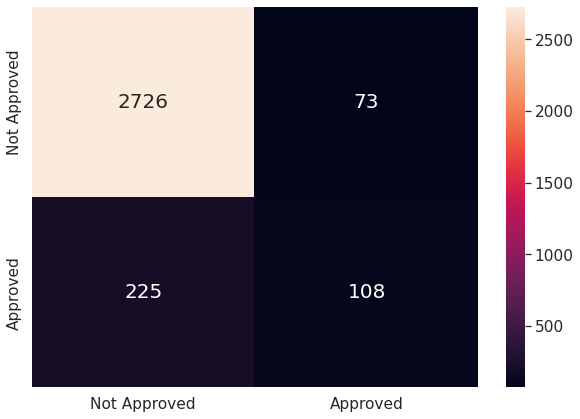

In [130]:
df_cm = pd.DataFrame(cm)
df_cm.index = ['Not Approved', 'Approved']
df_cm.columns = ['Not Approved', 'Approved']
names=['Not Approved', 'Approved']
print(df_cm)
fig = plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,fmt="d",annot_kws={"size": 20})